In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from preprocessing import *
%matplotlib inline

sns.set(style="whitegrid", palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 12,6
np.random.seed(42)

In [19]:
x = np.linspace(-10., 10., num=100)
sig=1/(1+np.exp(-x))
sigprime = sig * (1-sig)

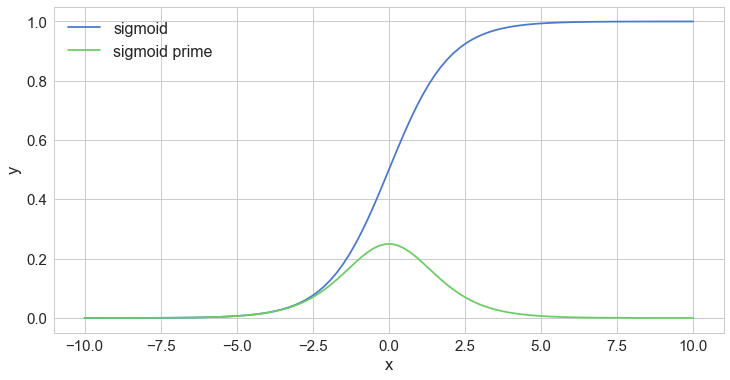

In [20]:
plt.plot(x, sig, label="sigmoid")
plt.plot(x, sigprime, label="sigmoid prime")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(prop={'size' : 16})
plt.show()

In [23]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [24]:
softmax(np.array([[2,4,6,8]]))

array([[0.00214401, 0.0158422 , 0.11705891, 0.86495488]])

Defining hyperparameters

In [54]:
epochs =50000
input_size=2;
hidden_size=3;
output_size=1;
Learning_Rate =0.1

In [55]:
X=np.array( [[0,0], [0,1], [1,0], [1,1]])
y=np.array([ [0], [1], [1], [0]])

In [56]:
w_hidden = np.random.uniform(size=(input_size,hidden_size))
w_output = np.random.uniform(size=(hidden_size,output_size))
print(w_hidden)
print(w_output)


[[0.62329813 0.33089802 0.06355835]
 [0.31098232 0.32518332 0.72960618]]
[[0.63755747]
 [0.88721274]
 [0.47221493]]


In [57]:
def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    return sig

In [58]:
def sigmoid_prime(x):
    sigmoid_prime = sigmoid(x) * sigmoid(1-x)
    return sigmoid_prime

In [59]:
for epoch in range(epochs):
    activation_hidden = sigmoid(np.dot(X, w_hidden))
    y_output = np.dot(activation_hidden, w_output)
    
    error = y - y_output
    
    if(epoch % 5000 == 0):
        print(f'error sum {sum(error)}')
    
    dZ = error * Learning_Rate
    w_output += activation_hidden.T.dot(dZ)
    dH = dZ.dot(w_output.T) * sigmoid_prime(activation_hidden)
    w_hidden += X.T.dot(dH)

error sum [-2.74211298]
error sum [-0.00045705]
error sum [-0.00049855]
error sum [-0.0090116]
error sum [-0.00702469]
error sum [8.75039299e-05]
error sum [3.23861092e-05]
error sum [1.20229402e-05]
error sum [4.46835812e-06]
error sum [1.66136469e-06]


In [60]:
X_test = X[1]
activation_hidden = sigmoid(np.dot(X_test, w_hidden))
np.dot(activation_hidden, w_output)

array([1.00000177])

In [62]:
X_test  = X[3]
activation_hidden = sigmoid(np.dot(X_test, w_hidden))
np.dot(activation_hidden, w_output)

array([-1.79345438e-06])

We got the desired outputs as required by the XOR function